# Regressão Logística com Estimators

Objetivo: prever com base nos atributos previsores da tabela abaixo, qual é o salário da pessoa. Se ela vai ganhar mais do que 50k dólares, ou menos ou igual a 50k dólares.

## Carregamento da Base de Dados

In [67]:
import pandas as pd
url = 'https://raw.githubusercontent.com/diegogrr/UdemyTF/master/classificacao/census.csv'
base = pd.read_csv(url)
base.head() #exibe os 5 primeiros registros

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Ver os valores únicos da coluna income (renda):

In [68]:
base['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

## Converter a saída para 0 ou 1

Vamos criar um função para a conversão de valores:

In [0]:
def converte_classe(rotulo):
  if rotulo == ' >50K':
    return 1
  else:
    return 0

Alterar os valores da coluna "income":

In [0]:
base['income'] = base['income'].apply(converte_classe)

Verificar as modificações da coluna "income":

In [71]:
base.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


Verificar se também tem o valor 1:

In [72]:
base['income'].unique()

array([0, 1])

x: atributos previsores; (dataframe)

y: resposta que é a classe; (Series)


In [73]:
x = base.drop('income', axis=1)
x.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [74]:
y = base['income']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64

Quando tem apenas uma coluna é considerado uma série:

In [75]:
print(type(y))

<class 'pandas.core.series.Series'>


Vamos ver um histograma da coluna `age`.

Observe que nós temos 10 faixas de idades.


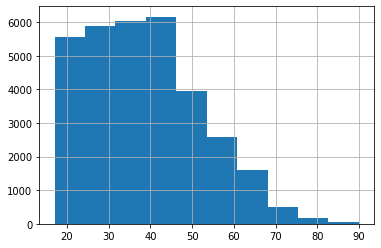

In [76]:
base.age.hist()

Ao invés de utilizar o atributo "age" como numérico, vamos tranformá-lo para categórico, com sendo faixas de idade.

## TensorFlow

In [77]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
tf.__version__

'2.2.0'

Primeiramente, criaremos um coluna numérica:

In [0]:
idade = tf.feature_column.numeric_column('age')

Criação da idade categórica:

In [79]:
idade_categorica = [tf.feature_column.bucketized_column(idade, boundaries=[20,30,40,50,60,70,80,90])]
print(idade_categorica)

[BucketizedColumn(source_column=NumericColumn(key='age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80, 90))]


Criar variável para os categóricos e variável para os numéricos.

In [80]:
print(x.columns)

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country'],
      dtype='object')


In [0]:
nome_colunas_categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

Ver os valores de uma coluna:

In [82]:
x['sex'].unique() #2 valores

array([' Male', ' Female'], dtype=object)

In [83]:
x['workclass'].unique() #9 valores

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [84]:
x['native-country'].unique() #vários valores, fica inviável passar cada atributo

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Vamos automatizar a aquisição dos valores categóricos por meio de um comando `for`:

In [0]:
colunas_categoricas = [tf.feature_column.categorical_column_with_vocabulary_list(key=c,vocabulary_list=x[c].unique()) for c in nome_colunas_categoricas]

In [86]:
print(colunas_categoricas[7])

VocabularyListCategoricalColumn(key='native-country', vocabulary_list=(' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico', ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland', ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan', ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland', ' Hungary', ' Holand-Netherlands'), dtype=tf.string, default_value=-1, num_oov_buckets=0)


Colunas numéricas:

In [0]:
nome_colunas_numericas = ['final-weight', 'education-num', 'capital-gain', 'capital-loos', 'hour-per-week']

In [0]:
colunas_numericas = [tf.feature_column.numeric_column(key=c) for c in nome_colunas_numericas]

In [89]:
print(colunas_numericas[0])

NumericColumn(key='final-weight', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)


Unir todas as colunas:

In [0]:
colunas = idade_categorica + colunas_categoricas + colunas_numericas

## Construção do Modelo

### Treinamento e Teste

In [0]:
from sklearn.model_selection import train_test_split
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.3)

In [92]:
print(x_treinamento.shape)
print(y_treinamento.shape)

(22792, 14)
(22792,)


In [93]:
print(x_teste.shape, y_teste.shape)

(9769, 14) (9769,)


In [0]:
funcao_treinamento = tf.estimator.inputs.pandas_input_fn(x=x_treinamento,y=y_treinamento,batch_size=32,num_epochs=None, shuffle=True)

Criar o classificador

In [95]:
classificador = tf.estimator.LinearClassifier(feature_columns=colunas)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpt1_umrnm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [96]:
classificador.train(input_fn=funcao_treinamento, steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpt1_umrnm/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 22.18071, step = 1
INFO:tensorflow:global_step/sec: 193.555
INFO:tensorflow:loss = 31607.895, step = 101 (0.518 sec)
INFO:tensorflow:global_step/sec: 308.259
INFO:tensorflow:loss = 7880.208, step = 201 (0.325 sec)
INFO:tensorflow:global_step/sec: 275.07
INFO:tensorflow:loss = 15858.037, step = 301 (0.366 sec)
INFO:tensorflow:global_step/sec: 308.447
INFO:tensorflow:loss = 5789.3926, step = 401 (0.322 sec)
INFO:tensorflow:global_step/sec: 288.298
INFO:tensorflow:loss = 19626.73, step = 501 (0.346 sec)
INFO:tenso

Função para a previsão:

In [0]:
funcao_previsao = tf.estimator.inputs.pandas_input_fn(x=x_teste,batch_size=32,shuffle=False)

In [0]:
previsoes = classificador.predict(input_fn=funcao_previsao)

In [99]:
list(previsoes)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpt1_umrnm/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.9981468], dtype=float32),
  'logits': array([6.2889805], dtype=float32),
  'probabilities': array([0.00185321, 0.9981468 ], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([1.659928e-24], dtype=float32),
  'logits': array([-54.75527], dtype=float32),
  'probabilities': array([1.000000e+00, 1.659928e-24], dtype=float32)},
 {'all_class_ids': array([0, 1], dtype=int32),
  'all_classes': array([b'0', b'1'], dtype=object),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object),
  'logistic': array([8.668249e-06], dtype=float32),
  'logits': array([-11.655844], dtype=float32),
  'probabilities': array([9.999913e-01, 8.668174e-06], dtype=

In [100]:
previsoes_final = []
for p in classificador.predict(input_fn=funcao_previsao):
  previsoes_final.append(p['class_ids'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpt1_umrnm/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [101]:
print(previsoes_final)

[array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([1]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([0]), array([1]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([0]), array([1]), array([0]), array([0]), array([0]), array([0]), array([1]), array([0]), array([1]), array([1]), array([1]), array([0]), array([1]), array([0]), arr

Visualizar a taxa de acerto:

In [102]:
from sklearn.metrics import accuracy_score
taxa_acerto = accuracy_score(y_teste,previsoes_final)
print(taxa_acerto)

0.7830893643156925
